<a href="https://colab.research.google.com/github/Neeraton/IPMV/blob/main/Exp_2_ipmv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from google.colab import files
uploaded = files.upload()

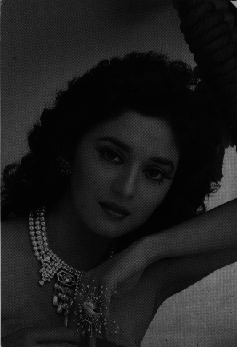

In [ ]:
img1=cv2.imread('MAD.TIF')
cv2_imshow(img1)

In [ ]:
I = cv2.imread("MAD.TIF", 0)
figsize = (10, 10)

In [ ]:
bins_edges_min_max = [0, 256]
num_bins = 256
bin_count, bins_edges = np.histogram(I, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

In [ ]:
def draw_hist(x_axis, input):
    fig, ax = plt.subplots(figsize=figsize)
    # why not using plt.hist? because we want to plot also some derivations of this hist, so this is easier
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax

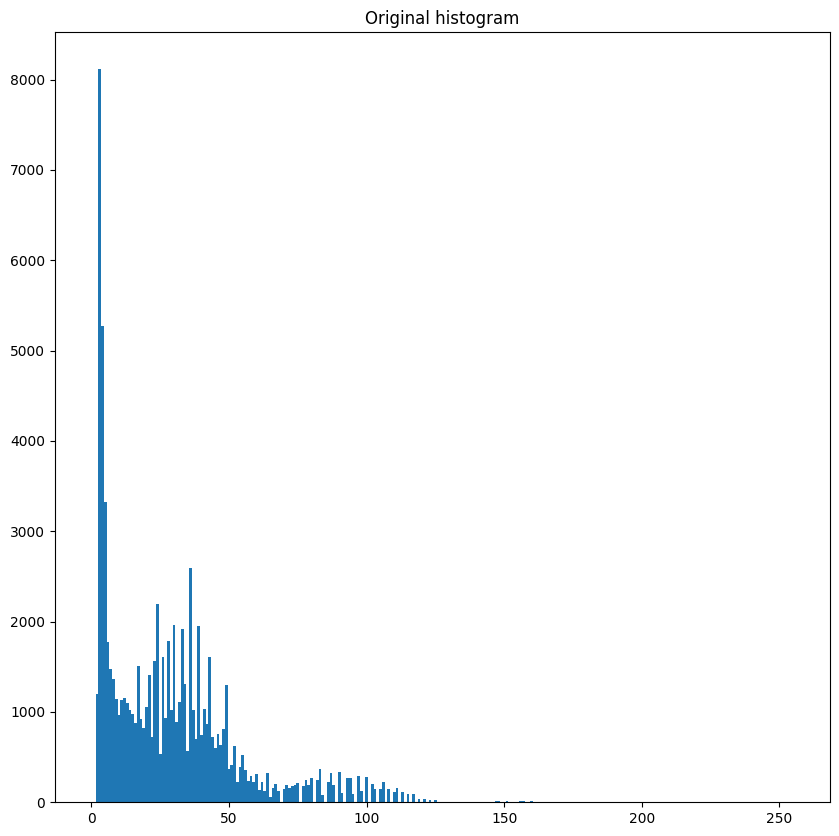

In [ ]:
draw_hist(bins_start, bin_count)
plt.title("Original histogram")
plt.show()

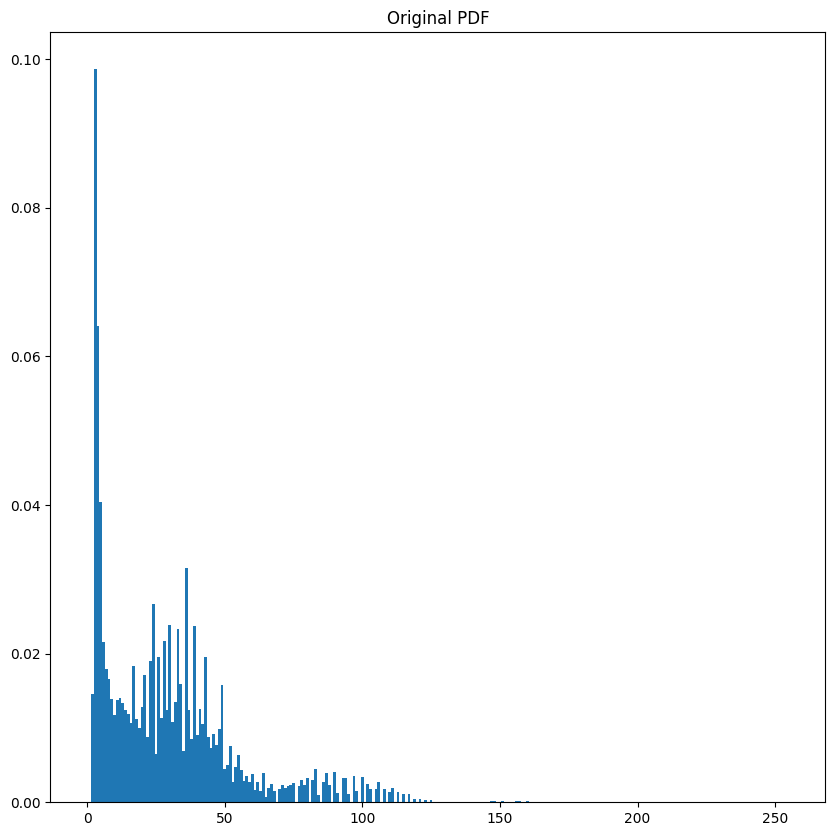

In [ ]:
pdf = bin_count / np.sum(bin_count)

draw_hist(bins_start, pdf)
plt.title("Original PDF")
plt.show()

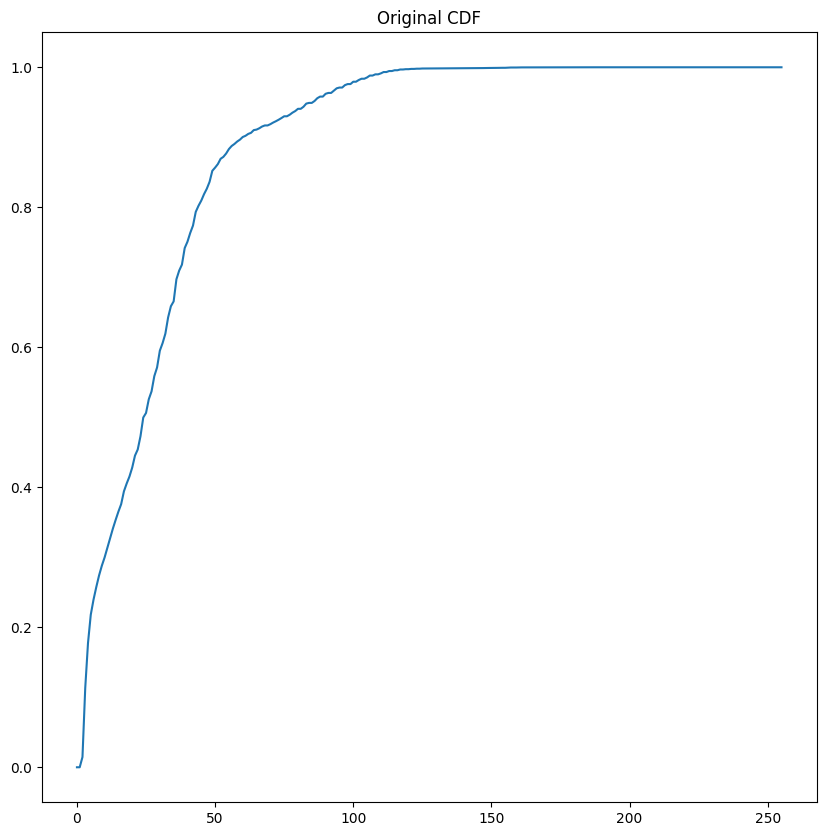

In [ ]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")
plt.show()

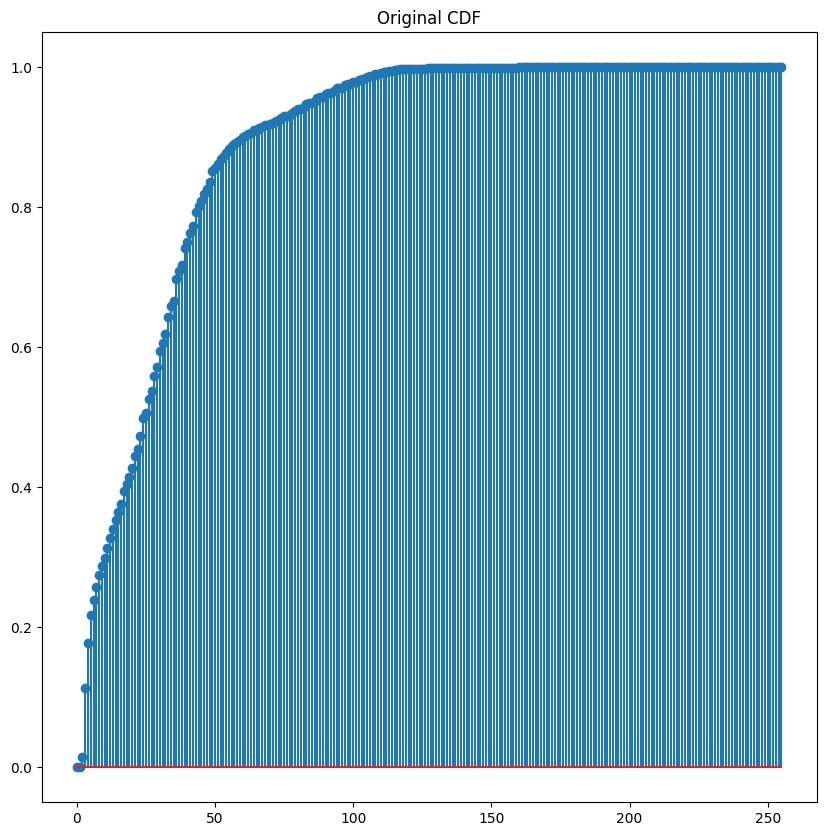

In [ ]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.stem(cdf)
plt.title("Original CDF")
plt.show()

In [ ]:
f_eq = np.round(cdf * 255).astype(int)

f_eq

array([  0,   0,   4,  29,  45,  56,  61,  66,  70,  73,  76,  80,  84,
        87,  90,  93,  96, 101, 103, 106, 109, 114, 116, 121, 127, 129,
       134, 137, 142, 146, 152, 155, 158, 164, 168, 170, 178, 181, 183,
       189, 191, 195, 197, 202, 205, 206, 209, 211, 213, 217, 218, 220,
       222, 222, 224, 225, 226, 227, 228, 229, 230, 230, 231, 231, 232,
       232, 233, 233, 234, 234, 234, 235, 235, 236, 236, 237, 237, 238,
       238, 239, 240, 240, 241, 242, 242, 242, 243, 244, 244, 244, 245,
       246, 246, 246, 247, 248, 248, 249, 249, 249, 250, 250, 250, 251,
       251, 251, 252, 252, 252, 252, 253, 253, 253, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

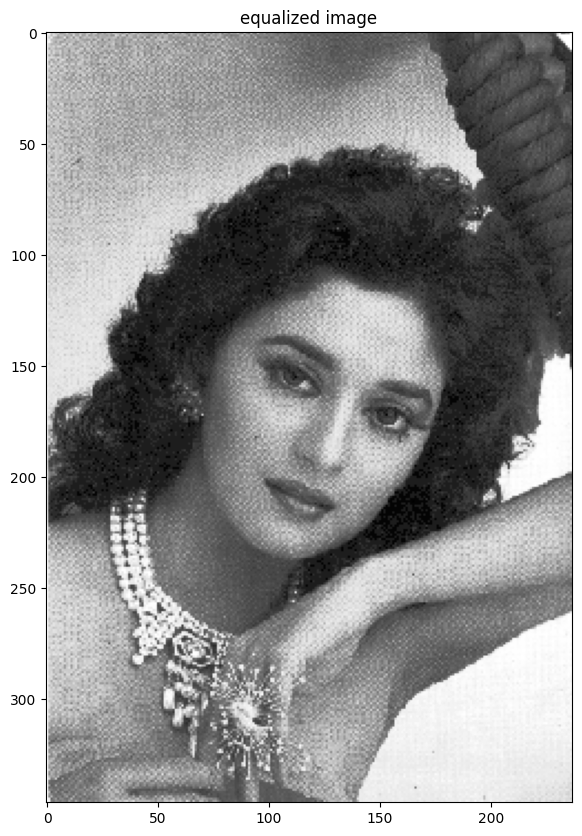

In [ ]:
I_eq = f_eq[I]

plt.figure(figsize=figsize)
plt.imshow(I_eq, cmap="gray", vmin=0, vmax=255)
plt.title("equalized image")
plt.show()


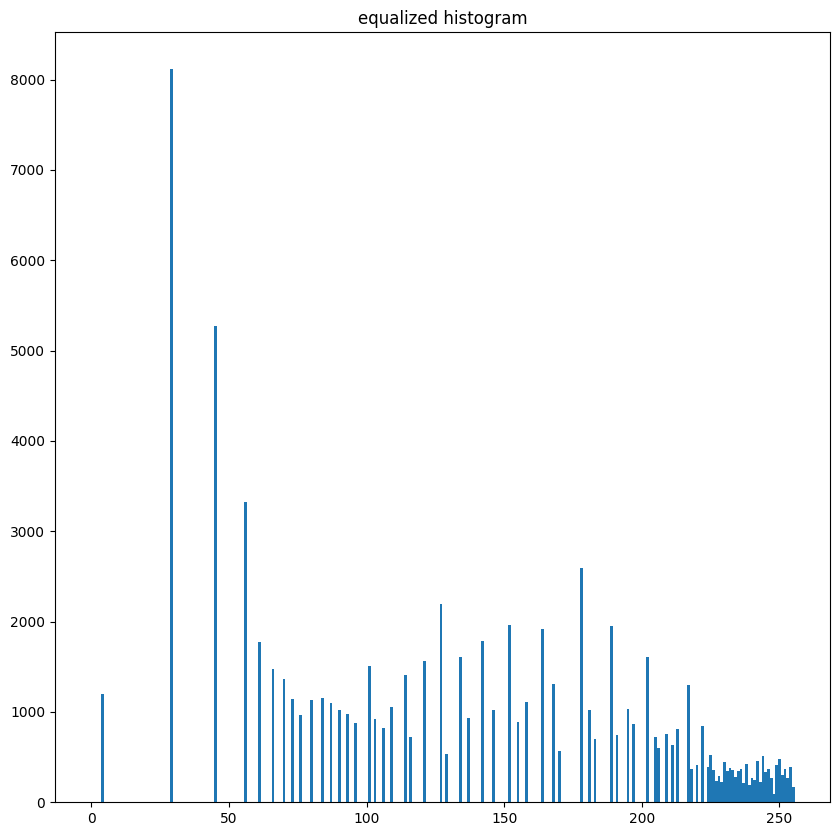

In [ ]:
bin_count, bins_edges = np.histogram(I_eq, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start, bin_count)
plt.title("equalized histogram")
plt.show()

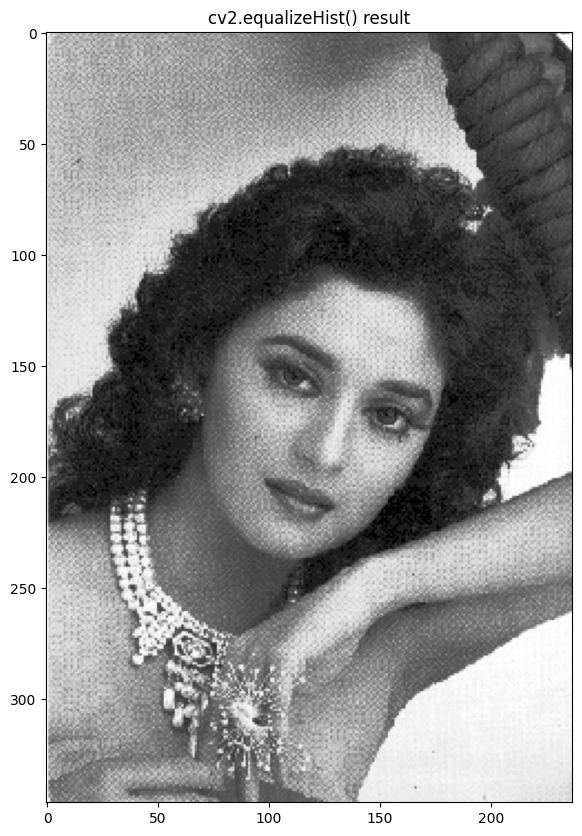

In [ ]:
I_eq_cv2 = cv2.equalizeHist(I)

plt.figure(figsize=figsize)
plt.imshow(I_eq_cv2, cmap="gray", vmin=0, vmax=255)
plt.title("cv2.equalizeHist() result")
plt.show()